In [1]:
# Below code found at https://github.com/jupyterlite/jupyterlite/issues/119
import pandas as pd 
#import micropip
#package_url = "https://raw.githubusercontent.com/innovationOUtside/ouseful_jupyterlite_utils/main/ouseful_jupyterlite_utils-0.0.1-py3-none-any.whl"
#await micropip.install(package_url)

#from ouseful_jupyterlite_utils import pandas_utils as pdu

# use this approach if CSV data is at a remote URL
# Via @jtpio
#URL = "https://raw.githubusercontent.com/edgecollective/wastewater-parse/main/waste.csv"
#df = pd.read_csv('test_by_date.csv')
#df1 = pd.read_csv('archive_mar7.csv')

#import pandas as pd 
#file = 'covid-19-raw-data-3-25-2022.xlsx'
#file = 'covid-19-raw-data-4-4-2022.xlsx'
#file = 'covid-19-dashboard_04-22-2022.xlsx'
file = 'covid-19-raw-data-5-23-2022.xlsx'
#file = 'covid-19-raw-data-5-13-2022.xlsx'
#file = 'covid-19-raw-data-5-3-2022.xlsx'
#file = 'covid-19-dashboard_03-16-2022.xlsx'
data = pd.ExcelFile(file)
#print(data.sheet_names)
sheet1='CasesByDate_Probable'
sheet2='Cases (Report Date)'
sheet3='CasesbyAge'
sheet4='TestingByDate (Test Date)'
df=data.parse(sheet2)
df

,Date,Positive Total,Positive New,Probable Total,Probable New,Estimated active cases
0,2020-06-01,97291,326,NaN,NaN,NaN
1,2020-06-02,97539,248,NaN,NaN,NaN
2,2020-06-03,97964,425,NaN,NaN,NaN
3,2020-06-04,98376,412,NaN,NaN,NaN
4,2020-06-05,98796,420,NaN,NaN,NaN
...,...,...,...,...,...,...
609,2022-05-17,1678118,3425,147129.0,751.0,NaN
610,2022-05-18,1682066,3948,147962.0,833.0,NaN
611,2022-05-19,1687023,4957,148642.0,680.0,NaN
612,2022-05-20,1690961,3938,149331.0,689.0,NaN


In [2]:
import matplotlib.pyplot as plt
import datetime as dt
        #d = dt.datetime.strptime(this_date,'%m/%d/%Y').date()

c_t=df['Date'].to_numpy()
#mol_total = df.iloc[:,[1]]
c_p =  df.iloc[:,[2]].to_numpy()
#ant_pos_new =  df.iloc[:,[4]].to_numpy()



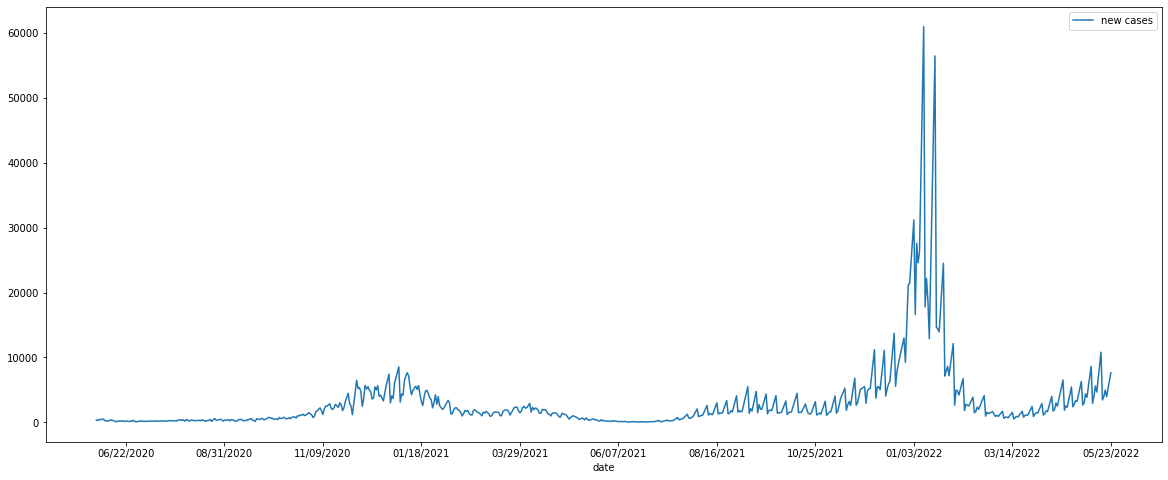

In [3]:
#https://matplotlib.org/3.5.1/gallery/subplots_axes_and_figures/two_scales.html


import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=(0), interval=10))

#max_counts = 1000
#head=400
#tail=300

# plot intial
#plt.subplot(1, 2, 1)
#plt.plot(x[len(x)-tail:],y[len(x)-tail:],'-o')
#plt.plot(x_w_n,y_w_n_norm,'-',label='wastewater north (c/mL, norm)')
#plt.plot(x_w_n_run,y_w_n_norm_run,'-',label='wastewater north running ave (c/mL, norm)')
#plt.plot(x_w_s_run,y_w_s_norm_run,'-',label='wastewater south running ave (c/mL, norm)')

#plt.plot(x_w_s,y_w_s_norm,'-',label='wastewater south (c/mL, norm)')

#scale_shift_water = y_w_t_norm*200+5

#fig, ax1 = plt.subplots()

#ax1.set_ylabel('exp', color='orange')

#print(scale_shift_water.min())

#ax1.plot(x_w_t,scale_shift_water,'-',label='wastewater north + south (c/mL), scaled and shifted')

#ax1.plot(ref_dates,r1+scale_shift_water.min(),'b--',linewidth=1,label = 'minimum wastewater value over time period')

#plt.plot(x_w_t_run,y_w_t_norm_run*3,'-',label='wastewater, north + south (copies/mL), norm, 3d running ave')


#plt.plot(x_m,y_m,'-',label = 'positivity (%) molecular')
plt.plot(c_t,c_p,'-',label = 'new cases')
#plt.plot(x_m,n_m,'-',label = 'new molecular tests')

#plt.plot(x_m_run,y_m_run*10,'-',label = 'positivity (%) molecular, 3 day running ave')

#reference line


#plt.plot(x_a,y_a,'-',label = 'positivity (%) antigen')
#plt.ylim([0,.6])
#plt.ylabel('copies/mL')
plt.xlabel('date')

#plt.show()
fig = plt.gcf()
fig.set_size_inches(20, 8)
#fig.suptitle('Wastewater and Testing Positivity Rate', fontsize=16)
#plt.title('Positivity is the fraction of positive molecular tests on a given day')
plt.legend()
#filename=region+'_full_limit_'+str(max_counts)+'_tail.pdf'
#plt.savefig('graphs/'+filename)
#plt.axis([0, 10, 0, 10])
#t = ("This ")
#plt.text(1, 1, t, ha='left',  wrap=True)

plt.show()



In [4]:
import matplotlib.pyplot as plt
import datetime as dt

dg = pd.read_csv('https://raw.githubusercontent.com/edgecollective/wastewater-parse/main/waste.csv')

region = 'Northern'
dates=dg['Date'].to_numpy()
counts_n=dg['Northern'].to_numpy()
counts_s=dg['Southern'].to_numpy()


In [5]:
x_w_n=[]
x_w_s=[]
y_w_n=[]
y_w_s=[]
x_w_t=[]
y_w_t=[]
for i in range(0,len(dates)):
    this_date = dates[i]
    this_count_n = str(counts_n[i])
    this_count_s = str(counts_s[i])
    if (len(this_date.split(" "))==1):
        if (len(this_count_n)>0) and (this_count_n != 'nan') and (len(this_count_n.split(" "))==1):
            if (len(this_count_s)>0) and (this_count_s != 'nan') and (len(this_count_s.split(" "))==1):
                
                d = dt.datetime.strptime(this_date,'%m/%d/%Y').date()
                
                x_w_n.append(d)
                y_w_n.append(float(this_count_n))
                
                x_w_s.append(d)
                y_w_s.append(float(this_count_s))

                x_w_t.append(d)
                #y_w_t.append(float(this_count_s)+float(this_count_n))
                y_w_t.append((float(this_count_s)+float(this_count_n))/2.)


In [6]:
#r1 = np.zeros(N)
import numpy as np
date_start=x_w_t[0]
date_end=x_w_t[len(x_w_t)-1]
ref_dates=[date_start,date_end]
#print(date_start,date_end)
r1=np.zeros(2)
print(r1,ref_dates)

[0. 0.] [datetime.date(2020, 3, 10), datetime.date(2022, 5, 23)]


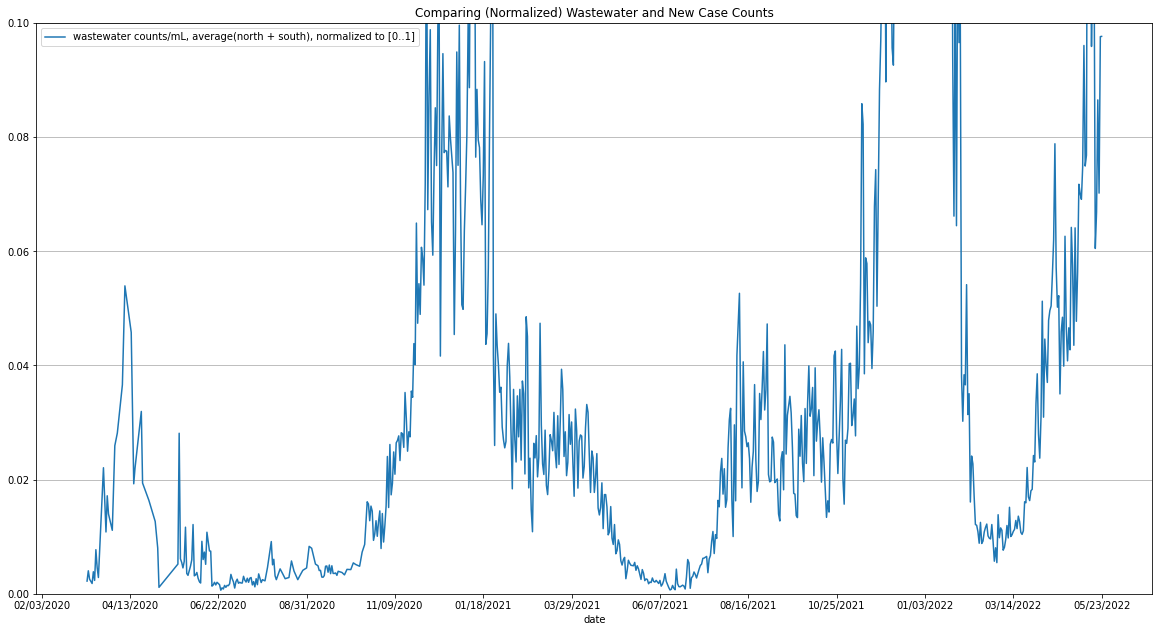

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=(0), interval=10))

max_counts = 1000
#head=400
tail=300

# plot intial
#plt.subplot(1, 2, 1)
#plt.plot(x[len(x)-tail:],y[len(x)-tail:],'-o')
#plt.plot(x_w_n,y_w_n_norm,'-',label='wastewater north (c/mL, norm)')
#plt.plot(x_w_n_run,y_w_n_norm_run,'-',label='wastewater north running ave (c/mL, norm)')
#plt.plot(x_w_s_run,y_w_s_norm_run,'-',label='wastewater south running ave (c/mL, norm)')

#plt.plot(x_w_s,y_w_s_norm,'-',label='wastewater south (c/mL, norm)')

#scaling = 500
#scale_shift_water_n = y_w_n_norm*scaling+60
#scale_shift_water_s = y_w_s_norm*scaling+60

waste_array = np.array(y_w_t)
waste_array_norm = waste_array/waste_array.max()

counts_array = np.array(c_p)
counts_array_norm = counts_array/counts_array.max()

#plt.plot(x_w_s,np.array(y_w_s)*(6/1.5),'-',label='wastewater south (c/mL), arbitrary scale & shfit')
#plt.plot(c_t,c_p,'-',label = 'number of new cases')

plt.plot(x_w_t,waste_array_norm,'-',label='wastewater counts/mL, average(north + south), normalized to [0..1]')
#plt.plot(c_t,counts_array_norm,'-',label = 'number of new cases, normalized to [0..1]')

max_y = 100
plt.ylim([0,0.1])
#plt.ylabel('copies/mL')
#plt.ylabel('% positivity')
plt.xlabel('date')

#plt.yticks(np.arange(0, 60, 5.0))
plt.grid(axis = 'y')
#plt.show()
fig = plt.gcf()
fig.set_size_inches(20, 10.5)
#fig.suptitle('Wastewater and Testing Positivity Rate', fontsize=16)
plt.title('Comparing (Normalized) Wastewater and New Case Counts')
plt.legend()
#filename=region+'_full_limit_'+str(max_counts)+'_tail.pdf'
#plt.savefig('graphs/'+filename)
#plt.axis([0, 10, 0, 10])
#t = ("This ")
#plt.text(1, 1, t, ha='left',  wrap=True)

plt.show()

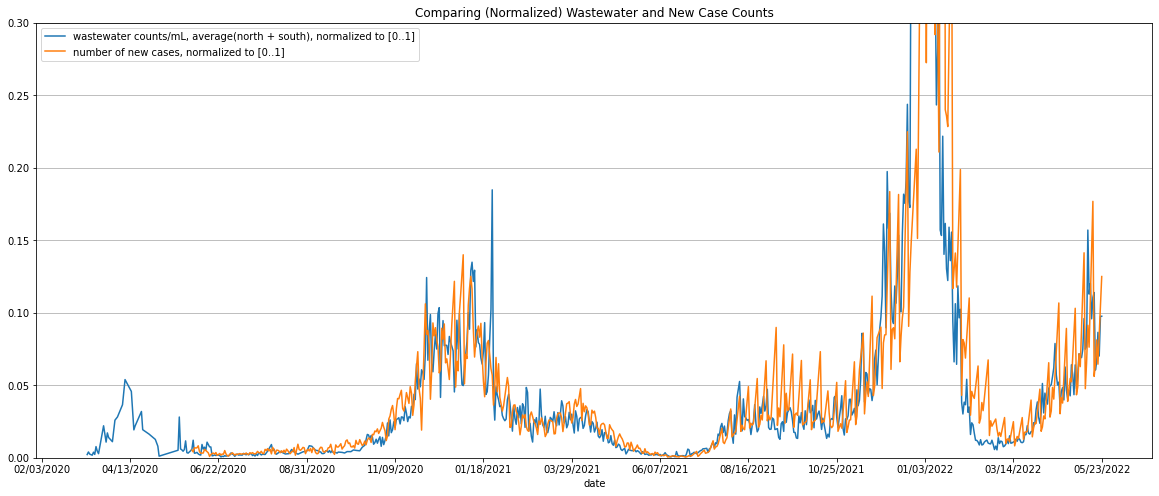

In [9]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=(0), interval=10))

max_counts = 1000
#head=400
tail=300

# plot intial
#plt.subplot(1, 2, 1)
#plt.plot(x[len(x)-tail:],y[len(x)-tail:],'-o')
#plt.plot(x_w_n,y_w_n_norm,'-',label='wastewater north (c/mL, norm)')
#plt.plot(x_w_n_run,y_w_n_norm_run,'-',label='wastewater north running ave (c/mL, norm)')
#plt.plot(x_w_s_run,y_w_s_norm_run,'-',label='wastewater south running ave (c/mL, norm)')

#plt.plot(x_w_s,y_w_s_norm,'-',label='wastewater south (c/mL, norm)')

#scaling = 500
#scale_shift_water_n = y_w_n_norm*scaling+60
#scale_shift_water_s = y_w_s_norm*scaling+60

waste_array = np.array(y_w_t)
waste_array_norm = waste_array/waste_array.max()

counts_array = np.array(c_p)
counts_array_norm = counts_array/counts_array.max()

#plt.plot(x_w_s,np.array(y_w_s)*(6/1.5),'-',label='wastewater south (c/mL), arbitrary scale & shfit')
#plt.plot(c_t,c_p,'-',label = 'number of new cases')

plt.plot(x_w_t,waste_array_norm,'-',label='wastewater counts/mL, average(north + south), normalized to [0..1]')
plt.plot(c_t,counts_array_norm,'-',label = 'number of new cases, normalized to [0..1]')

max_y = 100
plt.ylim([0,.3])
#plt.ylabel('copies/mL')
#plt.ylabel('% positivity')
plt.xlabel('date')

#plt.yticks(np.arange(0, 60, 5.0))
plt.grid(axis = 'y')
#plt.show()
fig = plt.gcf()
fig.set_size_inches(20, 8)
#fig.suptitle('Wastewater and Testing Positivity Rate', fontsize=16)
plt.title('Comparing (Normalized) Wastewater and New Case Counts')
plt.legend()
#filename=region+'_full_limit_'+str(max_counts)+'_tail.pdf'
#plt.savefig('graphs/'+filename)
#plt.axis([0, 10, 0, 10])
#t = ("This ")
#plt.text(1, 1, t, ha='left',  wrap=True)

plt.show()

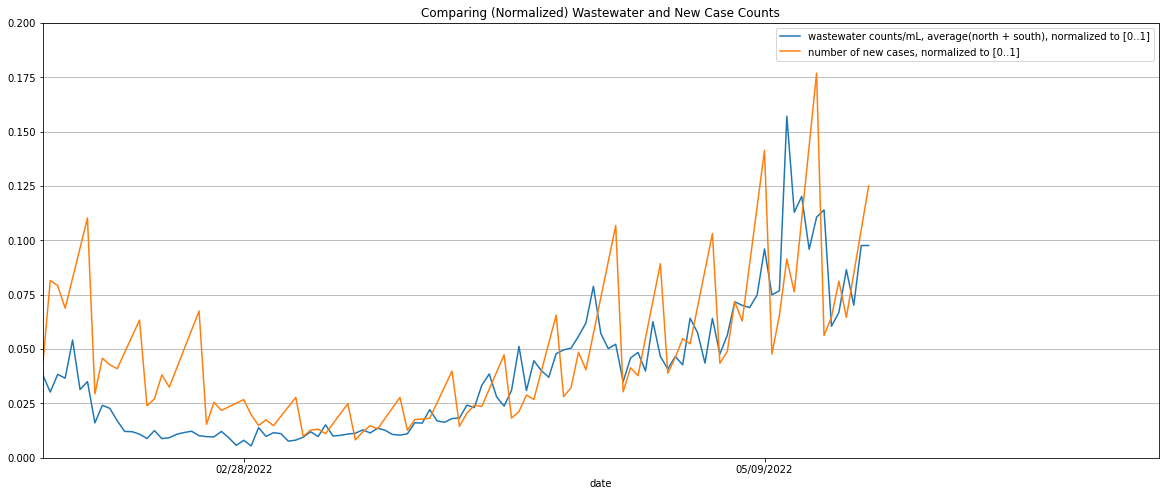

In [31]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime


fig, ax = plt.subplots()


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=(0), interval=10))

max_counts = 1000
#head=400
tail=300

# plot intial
#plt.subplot(1, 2, 1)
#plt.plot(x[len(x)-tail:],y[len(x)-tail:],'-o')
#plt.plot(x_w_n,y_w_n_norm,'-',label='wastewater north (c/mL, norm)')
#plt.plot(x_w_n_run,y_w_n_norm_run,'-',label='wastewater north running ave (c/mL, norm)')
#plt.plot(x_w_s_run,y_w_s_norm_run,'-',label='wastewater south running ave (c/mL, norm)')

#plt.plot(x_w_s,y_w_s_norm,'-',label='wastewater south (c/mL, norm)')

#scaling = 500
#scale_shift_water_n = y_w_n_norm*scaling+60
#scale_shift_water_s = y_w_s_norm*scaling+60

waste_array = np.array(y_w_t)
waste_array_norm = waste_array/waste_array.max()

counts_array = np.array(c_p)
counts_array_norm = counts_array/counts_array.max()

#plt.plot(x_w_s,np.array(y_w_s)*(6/1.5),'-',label='wastewater south (c/mL), arbitrary scale & shfit')
#plt.plot(c_t,c_p,'-',label = 'number of new cases')

ax.plot(x_w_t,waste_array_norm,'-',label='wastewater counts/mL, average(north + south), normalized to [0..1]')
ax.plot(c_t,counts_array_norm,'-',label = 'number of new cases, normalized to [0..1]')


def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

ave_window = 7

#y_w_n_norm_run = running_mean(y_w_n_norm,ave_window)
#len(y_w_n_norm_run)
#x_w_n_run = x_w_n[(ave_window-1):]

waste_array_norm_running = running_mean(waste_array_norm,ave_window)
waste_array_norm_running_x = x_w_t[(ave_window-1):]

#plt.plot(waste_array_norm_running_x,waste_array_norm_running,'-',label='wastewater counts/mL, average(north + south), normalized to [0..1] -- running average')



max_y = .2
plt.ylim([0,max_y])
#plt.ylabel('copies/mL')
#plt.ylabel('% positivity')
plt.xlabel('date')

#plt.yticks(np.arange(0, 60, 5.0))
plt.grid(axis = 'y')
#plt.show()
#fig = plt.gcf()
fig.set_size_inches(20, 8)
#fig.suptitle('Wastewater and Testing Positivity Rate', fontsize=16)
plt.title('Comparing (Normalized) Wastewater and New Case Counts')
plt.legend()
#filename=region+'_full_limit_'+str(max_counts)+'_tail.pdf'
#plt.savefig('graphs/'+filename)
#plt.axis([0, 10, 0, 10])
#t = ("This ")
#plt.text(1, 1, t, ha='left',  wrap=True)

ax.set_xlim([datetime.date(2022, 2, 1), datetime.date(2022, 7, 1)])


plt.show()

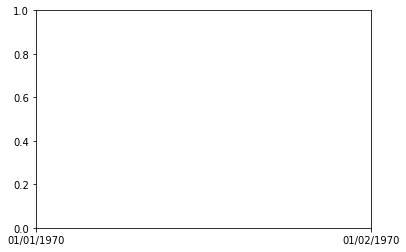

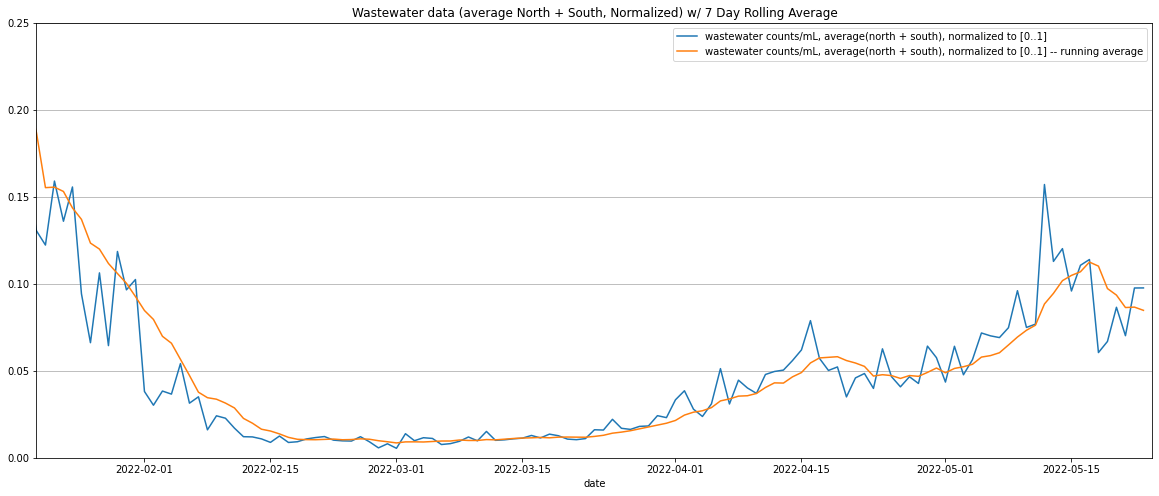

<Figure size 432x288 with 0 Axes>

In [37]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=(0), interval=10))

max_counts = 1000
#head=400
tail=300

# plot intial
#plt.subplot(1, 2, 1)
#plt.plot(x[len(x)-tail:],y[len(x)-tail:],'-o')
#plt.plot(x_w_n,y_w_n_norm,'-',label='wastewater north (c/mL, norm)')
#plt.plot(x_w_n_run,y_w_n_norm_run,'-',label='wastewater north running ave (c/mL, norm)')
#plt.plot(x_w_s_run,y_w_s_norm_run,'-',label='wastewater south running ave (c/mL, norm)')

#plt.plot(x_w_s,y_w_s_norm,'-',label='wastewater south (c/mL, norm)')

#scaling = 500
#scale_shift_water_n = y_w_n_norm*scaling+60
#scale_shift_water_s = y_w_s_norm*scaling+60

waste_array = np.array(y_w_t)
waste_array_norm = waste_array/waste_array.max()

counts_array = np.array(c_p)
counts_array_norm = counts_array/counts_array.max()

#plt.plot(x_w_s,np.array(y_w_s)*(6/1.5),'-',label='wastewater south (c/mL), arbitrary scale & shfit')
#plt.plot(c_t,c_p,'-',label = 'number of new cases')

fig, ax = plt.subplots()

ax.plot(x_w_t,waste_array_norm,'-',label='wastewater counts/mL, average(north + south), normalized to [0..1]')
#plt.plot(c_t,counts_array_norm,'-',label = 'number of new cases, normalized to [0..1]')


def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

ave_window = 7

#y_w_n_norm_run = running_mean(y_w_n_norm,ave_window)
#len(y_w_n_norm_run)
#x_w_n_run = x_w_n[(ave_window-1):]

waste_array_norm_running = running_mean(waste_array_norm,ave_window)
waste_array_norm_running_x = x_w_t[(ave_window-1):]

ax.plot(waste_array_norm_running_x,waste_array_norm_running,'-',label='wastewater counts/mL, average(north + south), normalized to [0..1] -- running average')



max_y = .25
plt.ylim([0,max_y])
#plt.ylabel('copies/mL')
#plt.ylabel('% positivity')
plt.xlabel('date')

#plt.yticks(np.arange(0, 60, 5.0))
plt.grid(axis = 'y')
#plt.show()
#fig = plt.gcf()
fig.set_size_inches(20, 8)
#fig.suptitle('Wastewater and Testing Positivity Rate', fontsize=16)
plt.title('Wastewater data (average North + South, Normalized) w/ 7 Day Rolling Average')
plt.legend()
#filename=region+'_full_limit_'+str(max_counts)+'_tail.pdf'
#plt.savefig('graphs/'+filename)
#plt.axis([0, 10, 0, 10])
#t = ("This ")
#plt.text(1, 1, t, ha='left',  wrap=True)

ax.set_xlim([datetime.date(2022, 1, 20), datetime.date(2022, 5, 24)])

plt.show()
plt.savefig("north_south_averaged_2022_04_28.png")

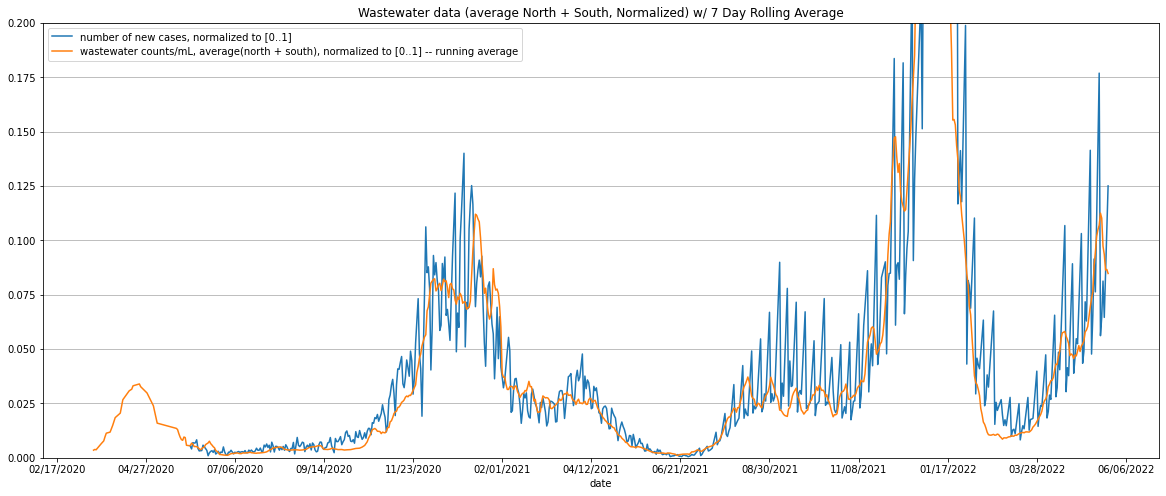

In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=(0), interval=10))

max_counts = 1000
#head=400
tail=300

# plot intial
#plt.subplot(1, 2, 1)
#plt.plot(x[len(x)-tail:],y[len(x)-tail:],'-o')
#plt.plot(x_w_n,y_w_n_norm,'-',label='wastewater north (c/mL, norm)')
#plt.plot(x_w_n_run,y_w_n_norm_run,'-',label='wastewater north running ave (c/mL, norm)')
#plt.plot(x_w_s_run,y_w_s_norm_run,'-',label='wastewater south running ave (c/mL, norm)')

#plt.plot(x_w_s,y_w_s_norm,'-',label='wastewater south (c/mL, norm)')

#scaling = 500
#scale_shift_water_n = y_w_n_norm*scaling+60
#scale_shift_water_s = y_w_s_norm*scaling+60

waste_array = np.array(y_w_t)
waste_array_norm = waste_array/waste_array.max()

counts_array = np.array(c_p)
counts_array_norm = counts_array/counts_array.max()

#plt.plot(x_w_s,np.array(y_w_s)*(6/1.5),'-',label='wastewater south (c/mL), arbitrary scale & shfit')
#plt.plot(c_t,c_p,'-',label = 'number of new cases')

#plt.plot(x_w_t,waste_array_norm,'-',label='wastewater counts/mL, average(north + south), normalized to [0..1]')
plt.plot(c_t,counts_array_norm,'-',label = 'number of new cases, normalized to [0..1]')


def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

ave_window = 7

#y_w_n_norm_run = running_mean(y_w_n_norm,ave_window)
#len(y_w_n_norm_run)
#x_w_n_run = x_w_n[(ave_window-1):]

waste_array_norm_running = running_mean(waste_array_norm,ave_window)
waste_array_norm_running_x = x_w_t[(ave_window-1):]

plt.plot(waste_array_norm_running_x,waste_array_norm_running,'-',label='wastewater counts/mL, average(north + south), normalized to [0..1] -- running average')



max_y = .2
plt.ylim([0,max_y])
#plt.ylabel('copies/mL')
#plt.ylabel('% positivity')
plt.xlabel('date')

#plt.yticks(np.arange(0, 60, 5.0))
plt.grid(axis = 'y')
#plt.show()
fig = plt.gcf()
fig.set_size_inches(20, 8)
#fig.suptitle('Wastewater and Testing Positivity Rate', fontsize=16)
plt.title('Wastewater data (average North + South, Normalized) w/ 7 Day Rolling Average')
plt.legend()
#filename=region+'_full_limit_'+str(max_counts)+'_tail.pdf'
#plt.savefig('graphs/'+filename)
#plt.axis([0, 10, 0, 10])
#t = ("This ")
#plt.text(1, 1, t, ha='left',  wrap=True)

plt.show()

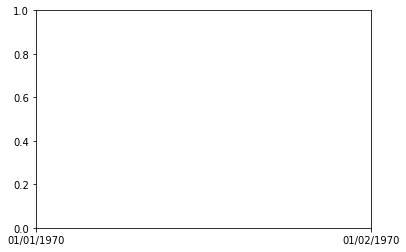

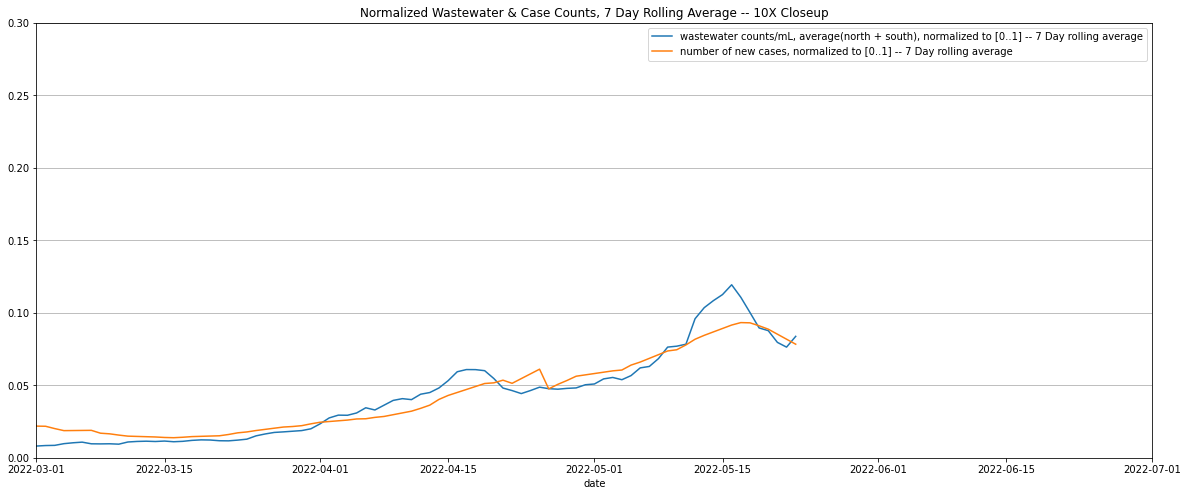

In [24]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime 

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=(0), interval=10))

max_counts = 1000
#head=400
tail=300

# plot intial
#plt.subplot(1, 2, 1)
#plt.plot(x[len(x)-tail:],y[len(x)-tail:],'-o')
#plt.plot(x_w_n,y_w_n_norm,'-',label='wastewater north (c/mL, norm)')
#plt.plot(x_w_n_run,y_w_n_norm_run,'-',label='wastewater north running ave (c/mL, norm)')
#plt.plot(x_w_s_run,y_w_s_norm_run,'-',label='wastewater south running ave (c/mL, norm)')

#plt.plot(x_w_s,y_w_s_norm,'-',label='wastewater south (c/mL, norm)')

#scaling = 500
#scale_shift_water_n = y_w_n_norm*scaling+60
#scale_shift_water_s = y_w_s_norm*scaling+60

waste_array = np.array(y_w_t)
waste_array_norm = waste_array/waste_array.max()

counts_array = np.array(c_p)
counts_array_norm = counts_array/counts_array.max()

#plt.plot(x_w_s,np.array(y_w_s)*(6/1.5),'-',label='wastewater south (c/mL), arbitrary scale & shfit')
#plt.plot(c_t,c_p,'-',label = 'number of new cases')

#plt.plot(x_w_t,waste_array_norm,'-',label='wastewater counts/mL, average(north + south), normalized to [0..1]')
#plt.plot(c_t,counts_array_norm,'-',label = 'number of new cases, normalized to [0..1]')


def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

ave_window = 5

#y_w_n_norm_run = running_mean(y_w_n_norm,ave_window)
#len(y_w_n_norm_run)
#x_w_n_run = x_w_n[(ave_window-1):]

waste_array_norm_running = running_mean(waste_array_norm,ave_window)
waste_array_norm_running_norm = waste_array_norm_running/waste_array_norm_running.max()
waste_array_norm_running_x = x_w_t[(ave_window-1):]

counts_norm_running = running_mean(counts_array_norm,ave_window)
counts_norm_running_norm = counts_norm_running/counts_norm_running.max()
counts_norm_running_x = c_t[(ave_window-1):]

fig, ax = plt.subplots()

ax.plot(waste_array_norm_running_x,waste_array_norm_running,'-',label='wastewater counts/mL, average(north + south), normalized to [0..1] -- 7 Day rolling average')
ax.plot(counts_norm_running_x,counts_norm_running,'-',label = 'number of new cases, normalized to [0..1] -- 7 Day rolling average')



max_y = .3
plt.ylim([0,max_y])
#plt.ylabel('copies/mL')
#plt.ylabel('% positivity')
plt.xlabel('date')

#plt.yticks(np.arange(0, 60, 5.0))
plt.grid(axis = 'y')
#plt.show()
#fig = plt.gcf()
fig.set_size_inches(20, 8)
#fig.suptitle('Wastewater and Testing Positivity Rate', fontsize=16)
plt.title('Normalized Wastewater & Case Counts, 7 Day Rolling Average -- 10X Closeup')
plt.legend()
#filename=region+'_full_limit_'+str(max_counts)+'_tail.pdf'
#plt.savefig('graphs/'+filename)
#plt.axis([0, 10, 0, 10])
#t = ("This ")
#plt.text(1, 1, t, ha='left',  wrap=True)

ax.set_xlim([datetime.date(2022, 3, 1), datetime.date(2022, 7, 1)])

plt.show()

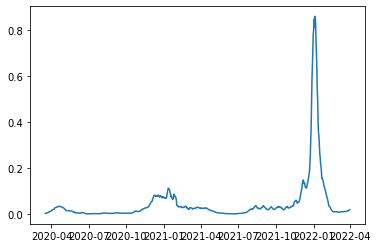

In [27]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

ave_window = 7

#y_w_n_norm_run = running_mean(y_w_n_norm,ave_window)
#len(y_w_n_norm_run)
#x_w_n_run = x_w_n[(ave_window-1):]

waste_array_norm_running = running_mean(waste_array_norm,ave_window)
waste_array_norm_running_x = x_w_t[(ave_window-1):]

plt.plot(waste_array_norm_running_x,waste_array_norm_running,'-',label='wastewater counts/mL, average(north + south), normalized to [0..1]')
#plt.plot(c_t,counts_array_norm,'-',label = 'number of new cases, normalized to [0..1]')

plt.show()